In [1]:
#firstly we imported all the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
# Loading  the dataset that we got from kaggle
data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
data


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,03-02-2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,02-09-2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
# Exploring  the dataset and describing it 
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
#  Preprocessing the dataset 
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [6]:
# Defining the  features and target variable
features = ['Customer type', 'Gender', 'Total','Product line', 'Quantity','Branch','City']
X = data[features]
y = data['Rating']


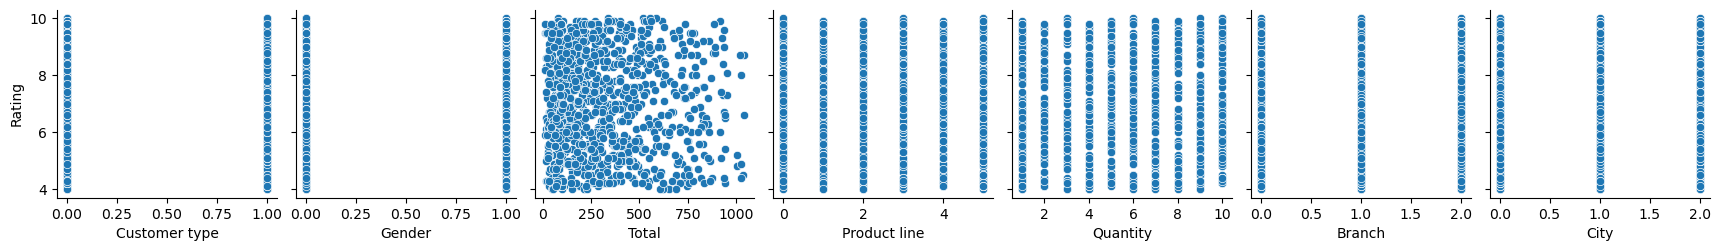

In [7]:
#  Doing the Exploratory Data Analysis (EDA)
sns.pairplot(data, x_vars=features, y_vars='Rating', kind='scatter')
plt.show()

In [8]:
# Splitting the  data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Building the  Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Making  predictions
y_pred = model.predict(X_test)


In [11]:
# Evaluating the  model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.1058213596610846


In [12]:
print("The Linear Regression model that we used suggests that the selected features (Branch, City, Product line, Customer type, Gender, Total, Quantity) have an impact on customer ratings. By analyzing these features,  we belive the company can gain insights into how different branches, city locations, and product lines influence customer satisfaction. This analysis can guide decision-making to enhance the customer experience and optimize offerings. Similar approaches can be replicated in other industries to understand the effects of various factors on customer ratings and preferences.")

The Linear Regression model that we used suggests that the selected features (Branch, City, Product line, Customer type, Gender, Total, Quantity) have an impact on customer ratings. By analyzing these features,  we belive the company can gain insights into how different branches, city locations, and product lines influence customer satisfaction. This analysis can guide decision-making to enhance the customer experience and optimize offerings. Similar approaches can be replicated in other industries to understand the effects of various factors on customer ratings and preferences.


In [122]:
# Selecting the  features for clustering
features = ['Customer type', 'Gender', 'Total', 'Quantity', 'Rating']
X = data[features]

In [123]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [124]:
# Perform K-Means clustering
n_clusters = 3  
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

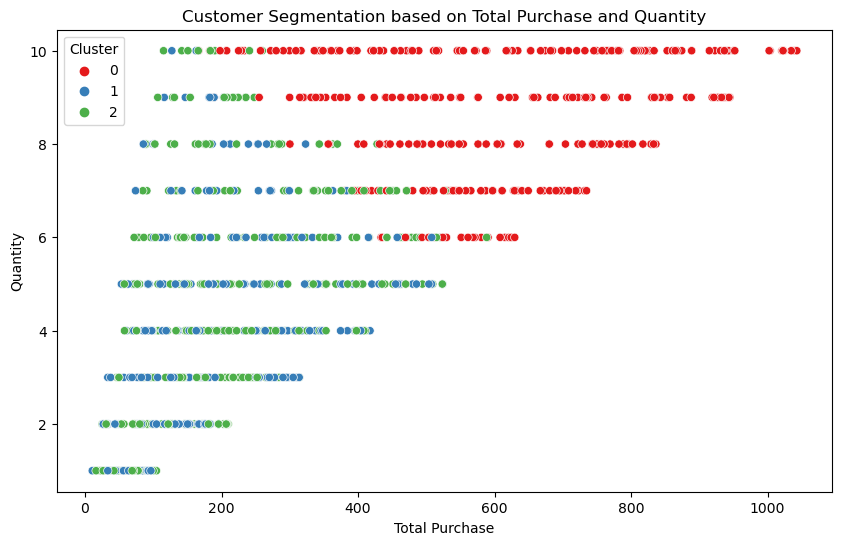

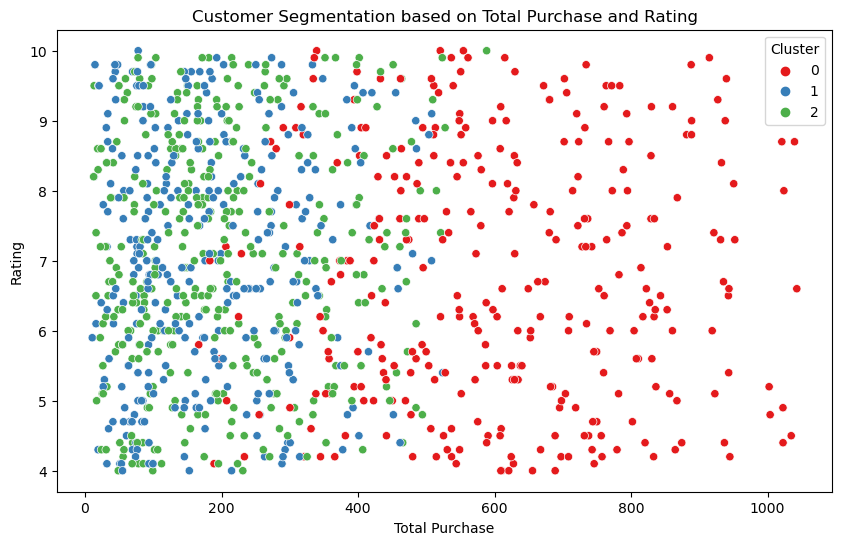

         Invoice ID    Branch      City  Customer type    Gender  \
Cluster                                                            
0        496.844660  1.019417  0.990291       0.414239  0.430421   
1        472.028125  1.021875  1.006250       0.000000  0.500000   
2        525.407008  0.932615  1.024259       1.000000  0.555256   

         Product line  Unit price  Quantity     Tax 5%       Total       Date  \
Cluster                                                                         
0            2.498382   69.197864  8.611650  29.210325  613.416830  41.757282   
1            2.453125   50.357250  3.865625   8.671409  182.099597  43.718750   
2            2.412399   48.991024  4.345013   9.645627  202.558160  44.760108   

               Time   Payment        cogs  gross margin percentage  \
Cluster                                                              
0        245.339806  1.022654  584.206505                 4.761905   
1        251.400000  0.968750  173.428187  

In [125]:
# Visualizing  customer segmentation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Quantity', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation based on Total Purchase and Quantity')
plt.xlabel('Total Purchase')
plt.ylabel('Quantity')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Rating', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation based on Total Purchase and Rating')
plt.xlabel('Total Purchase')
plt.ylabel('Rating')
plt.show()

# Analyzing clusters
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

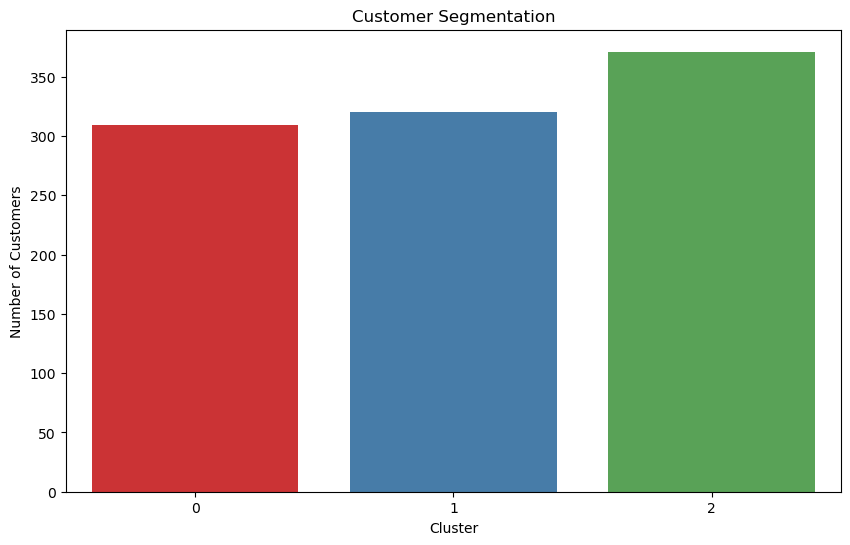

In [126]:
# Visualize customer segmentation with bar charts
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=data, palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

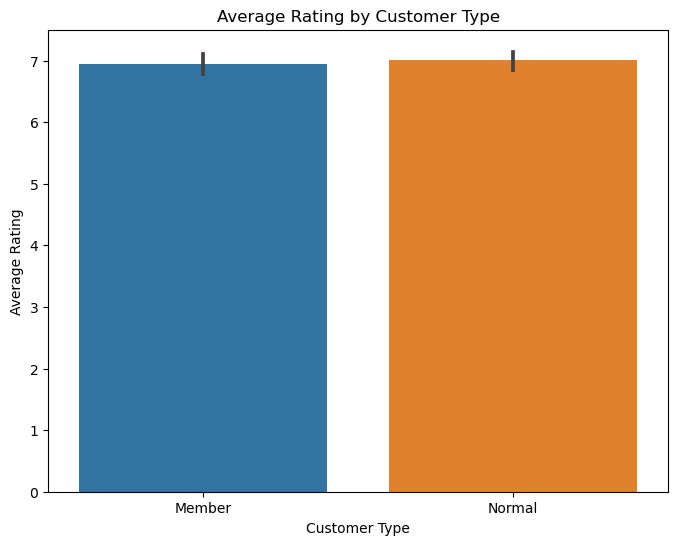

In [128]:
# Visualization 2: Average Rating by Customer Type
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer type', y='Rating', data=data)
plt.title('Average Rating by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1], labels=['Member', 'Normal'], rotation=0)
plt.show()

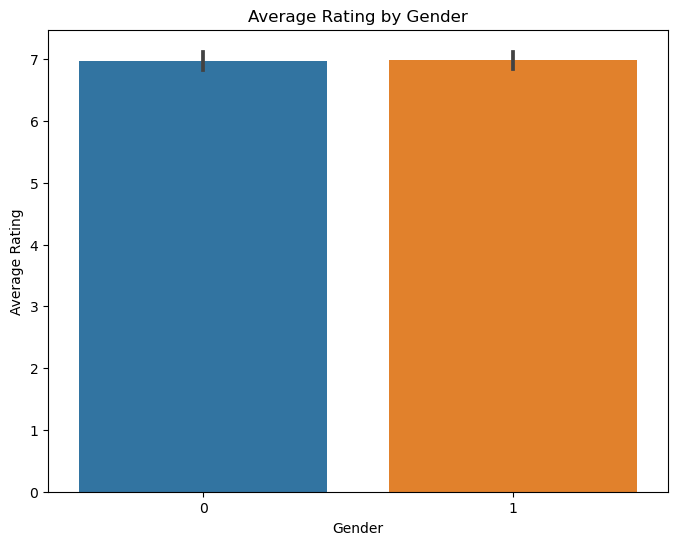

In [134]:
# Visualization 3: Average Rating by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Rating', data=data)
plt.title('Average Rating by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

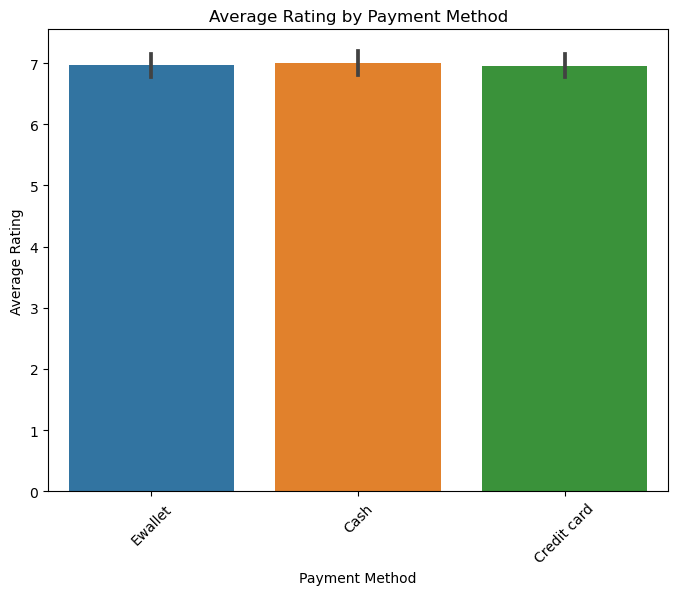

In [137]:
# Visualization 8: Rating by Payment Method
plt.figure(figsize=(8, 6))
sns.barplot(x='Payment', y='Rating', data=data)
plt.title('Average Rating by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1, 2], labels=['Ewallet', 'Cash', 'Credit card'], rotation=45)
plt.show()


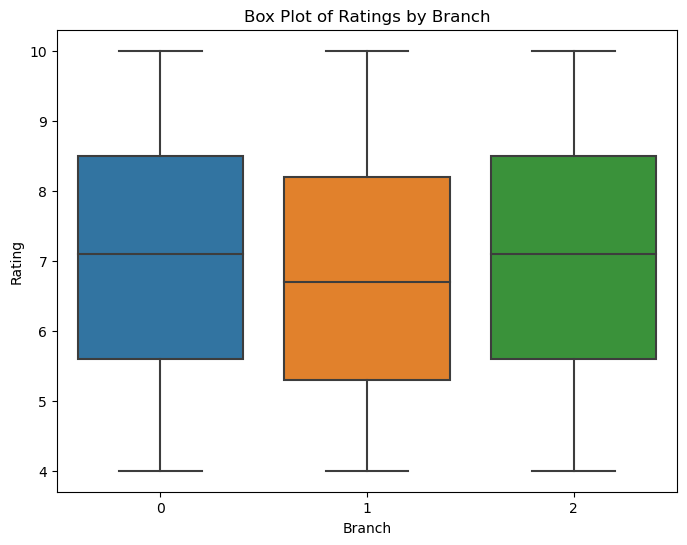

In [138]:
# Visualization 9: Box Plot of Ratings by Branch
plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='Rating', data=data)
plt.title('Box Plot of Ratings by Branch')
plt.xlabel('Branch')
plt.ylabel('Rating')
plt.show()

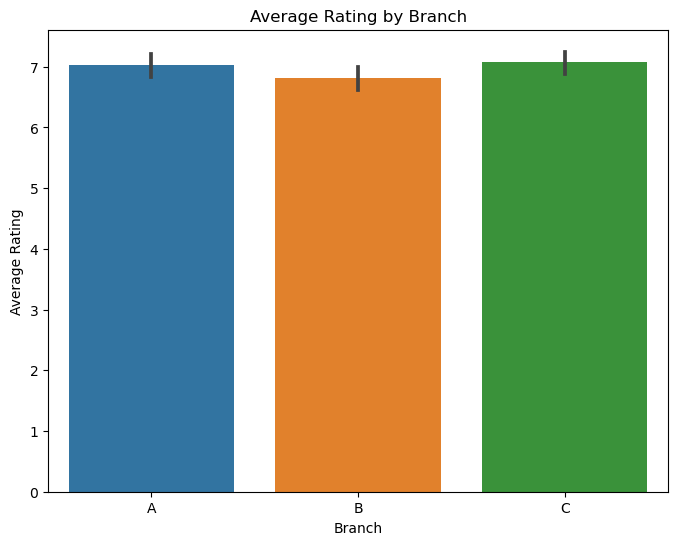

In [140]:
# Visualization 8: Rating by Branch
plt.figure(figsize=(8, 6))
sns.barplot(x='Branch', y='Rating', data=data)
plt.title('Average Rating by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Rating')
plt.xticks(ticks=[0, 1, 2], labels=['A', 'B', 'C'], rotation=0)
plt.show()